Trash CRS: EPSG:4326
Seoul CRS: PROJCS["PCS_ITRF2000_TM",GEOGCS["ITRF2000",DATUM["International_Terrestrial_Reference_Frame_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6656"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]

📌 서울 데이터 컬럼: ['nm', 'geometry']
📌 구 이름 목록:
['종로구' '중구' '용산구' '성동구' '광진구' '동대문구' '중랑구' '성북구' '강북구' '도봉구' '노원구' '은평구'
 '서대문구' '마포구' '양천구' '강천구' '구로구' '금천구' '영등포구' '동작구' '관악구' '서초구' '강남구' '송파구'
 '강동구']

📌 전체 구 개수: 25
📌 마포구 필터링 결과: 1개

📌 마포구 bounds: [ 942906.60244304 1948483.45361469  952623.33665071 1954735.40765838]
📌 쓰레기통 bounds: [ 907351.74101545 1471606.72636434 1106824.26003693 1983058.8817598 ]


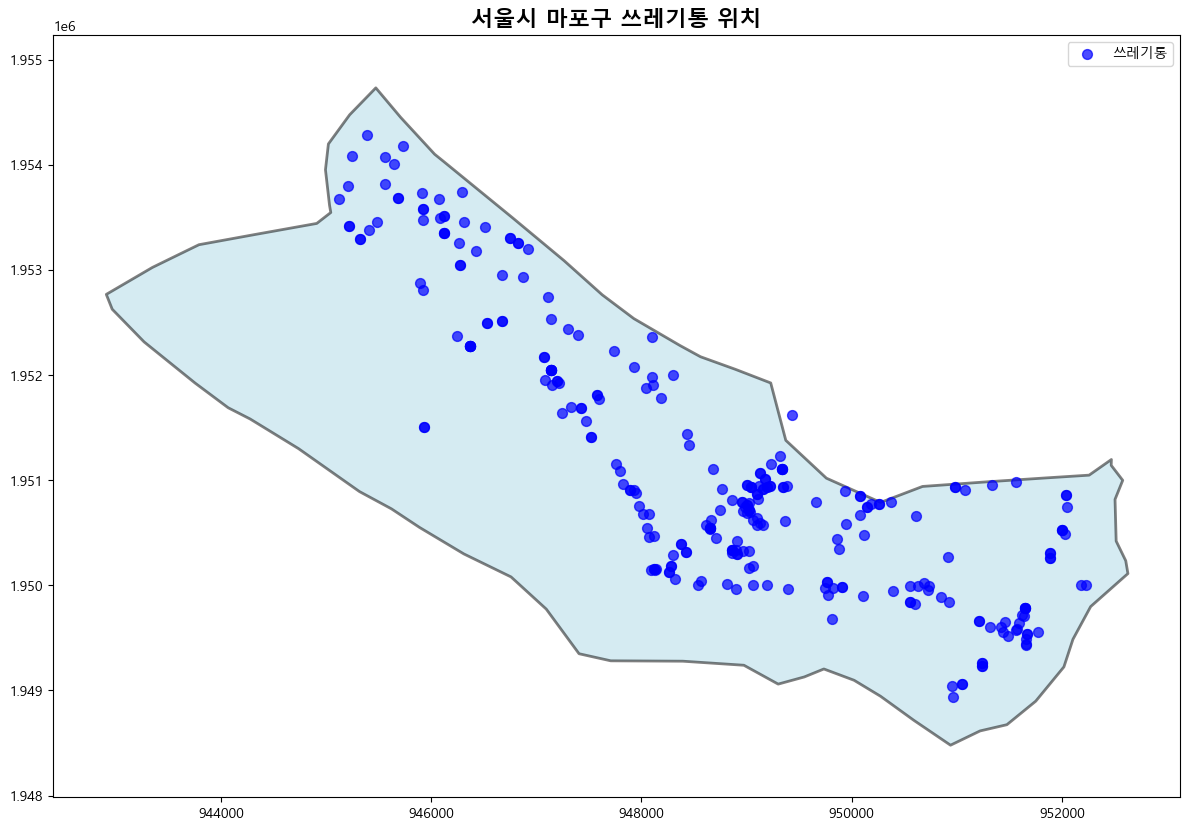

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import config, os
from shapely.validation import make_valid
from sklearn.preprocessing import MinMaxScaler

# 예: 쓰레기통 용량과 위치 데이터가 스케일이 다를 때
scaler = MinMaxScaler()

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1️⃣ 데이터 경로
trash_path = os.path.join(config.DATA_DIR, '서울 쓰레기통 지오코딩/a.shp')
seoul_path = os.path.join(config.DATA_DIR, '서울 구경계 지오코딩/seoul_EPSG5179.shp')

# 2️⃣ 데이터 불러오기
trash = gpd.read_file(trash_path)
seoul = gpd.read_file(seoul_path, engine='fiona', encoding='utf-8')  # utf-8 대신 cp949

# geometry 유효성 검사
seoul['geometry'] = seoul['geometry'].apply(
    lambda geom: make_valid(geom) if geom and not geom.is_valid else geom
)

# 3️⃣ 좌표계 확인
print("Trash CRS:", trash.crs)
print("Seoul CRS:", seoul.crs)

# 4️⃣ 좌표계 통일
trash = trash.to_crs(seoul.crs)

# 5️⃣ 데이터 확인 (중요!)
print("\n📌 서울 데이터 컬럼:", seoul.columns.tolist())
print("📌 구 이름 목록:")
print(seoul['nm'].unique())
print(f"\n📌 전체 구 개수: {len(seoul)}")

# 마포구 선택
mapo = seoul[seoul['nm'] == '마포구']
print(f"📌 마포구 필터링 결과: {len(mapo)}개")

# ⚠️ 마포구가 비어있으면 전체 서울 표시
if mapo.empty:
    print("⚠️ 마포구를 찾을 수 없습니다! 전체 서울을 표시합니다.")
    mapo = seoul  # 임시로 전체 표시

# 6️⃣ 범위 확인
print(f"\n📌 마포구 bounds: {mapo.total_bounds}")
print(f"📌 쓰레기통 bounds: {trash.total_bounds}")

# 7️⃣ 시각화
fig, ax = plt.subplots(figsize=(12, 10))

# 마포구 경계 (진하게)
mapo.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=2, alpha=0.5)

# 쓰레기통 (크게)
trash.plot(ax=ax, color='blue', markersize=50, alpha=0.7, label='쓰레기통')

# 축 범위를 마포구에 맞춤
if not mapo.empty:
    ax.set_xlim(mapo.total_bounds[0] - 500, mapo.total_bounds[2] + 500)
    ax.set_ylim(mapo.total_bounds[1] - 500, mapo.total_bounds[3] + 500)

plt.title("서울시 마포구 쓰레기통 위치", fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

Index(['adm_nm', 'adm_cd2', 'sgg', 'sido', 'sidonm', 'sggnm', 'adm_cd',
       'geometry'],
      dtype='object')
마포구 데이터 개수: 16
마포구 동 목록:
['서울특별시 마포구 용강동' '서울특별시 마포구 대흥동' '서울특별시 마포구 염리동' '서울특별시 마포구 신수동'
 '서울특별시 마포구 서교동' '서울특별시 마포구 합정동' '서울특별시 마포구 망원1동' '서울특별시 마포구 망원2동'
 '서울특별시 마포구 연남동' '서울특별시 마포구 성산1동' '서울특별시 마포구 성산2동' '서울특별시 마포구 상암동'
 '서울특별시 마포구 도화동' '서울특별시 마포구 서강동' '서울특별시 마포구 공덕동' '서울특별시 마포구 아현동']


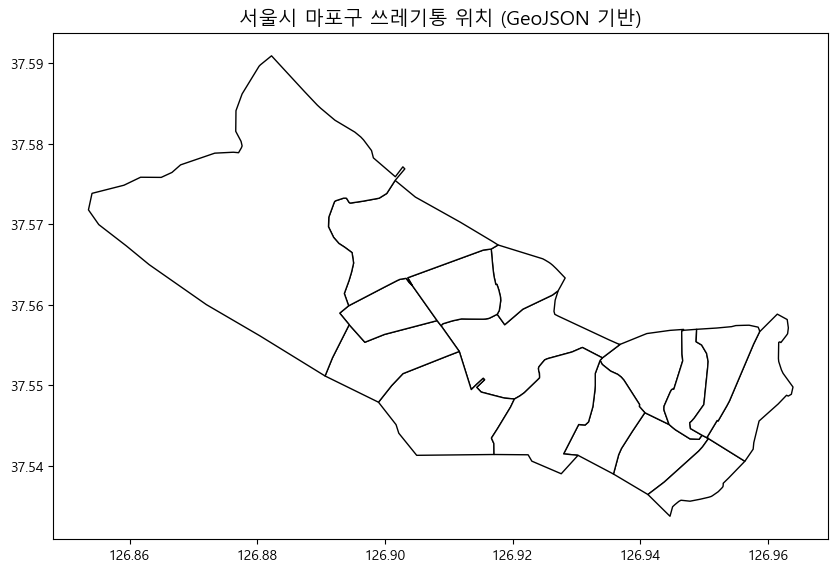

In [26]:
# 경로 지정
seoul_geojson_path = os.path.join(config.DATA_DIR, 'HangJeongDong_ver20250401.geojson')

# 데이터 불러오기
seoul_hang = gpd.read_file(seoul_geojson_path)

# 좌표계 통일
trash = trash.to_crs(seoul_hang.crs)

# 마포구만 선택 (컬럼 이름 확인 후 수정)
print(seoul_hang.columns)
# 마포구 데이터 필터링 (adm_nm에 '마포구'가 포함된 모든 행)
mapo_hang = seoul_hang[seoul_hang['sggnm'] == '마포구']

print(f"마포구 데이터 개수: {len(mapo_hang)}")
print(f"마포구 동 목록:\n{mapo_hang['adm_nm'].unique()}")

# 시각화
if len(mapo_hang) > 0:
    fig, ax = plt.subplots(figsize=(10, 8))
    mapo_hang.plot(ax=ax, color='white', edgecolor='black')
    plt.title("서울시 마포구 쓰레기통 위치 (GeoJSON 기반)", fontsize=14)
    plt.show()
else:
    print("마포구 데이터를 찾을 수 없습니다.")


In [ ]:
import folium
from folium import plugins

# 마포구 중심 좌표
center = [mapo_hang.geometry.centroid.y.mean(), mapo.geometry.centroid.x.mean()]

# Folium 지도 생성
m = folium.Map(location=center, zoom_start=13, tiles='OpenStreetMap')

# 마포구 경계 추가
folium.GeoJson(
    mapo_hang,
    name='마포구 행정동',
    style_function=lambda x: {
        'fillColor': 'lightblue',
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5
    }
).add_to(m)

# 쓰레기통 위치 추가
for idx, row in trash.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color='red',
        fill=True,
        fillColor='red',
        fillOpacity=0.7,
        popup=f"쓰레기통 {idx}"
    ).add_to(m)

# 레이어 컨트롤 추가
folium.LayerControl().add_to(m)

# 지도 저장 및 표시
m.save('mapo_trash.html')
m  # Jupyter에서는 바로 표시

Seoul CRS: EPSG:5181

📌 서울 상권 데이터 컬럼: ['TRDAR_SE_C', 'TRDAR_SE_1', 'TRDAR_CD', 'TRDAR_CD_N', 'XCNTS_VALU', 'YDNTS_VALU', 'SIGNGU_CD', 'SIGNGU_CD_', 'ADSTRD_CD', 'ADSTRD_CD_', 'RELM_AR', 'geometry']

📌 전체 구: ['종로구' '중구' '용산구' '성동구' '광진구' '동대문구' '중랑구' '성북구' '강북구' '도봉구' '노원구' '은평구'
 '서대문구' '마포구' '양천구' '강서구' '구로구' '금천구' '영등포구' '동작구' '관악구' '서초구' '강남구' '송파구'
 '강동구']


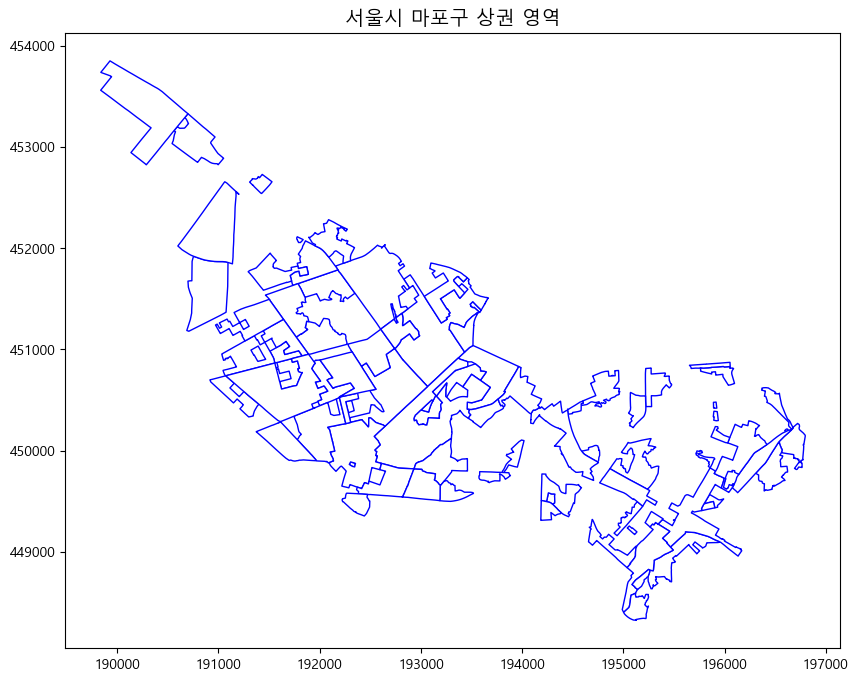

In [59]:
# 1️⃣ 데이터 경로
seoul_commerce_path = os.path.join(config.DATA_DIR, '상권 영역 좌표/서울시 상권분석서비스(영역-상권).shp')

# 2️⃣ 데이터 불러오기
seoul_commerce = gpd.read_file(seoul_commerce_path, encoding='utf-8')  # utf-8 대신 cp949

# 3️⃣ 좌표계 확인
print("Seoul CRS:", seoul_commerce.crs)

# 5️⃣ 데이터 확인 (중요!)
print("\n📌 서울 상권 데이터 컬럼:", seoul_commerce.columns.tolist())
print(f"\n📌 전체 구: {seoul_commerce['SIGNGU_CD_'].unique()}")

seoul_commerce_mapo = seoul_commerce[seoul_commerce['SIGNGU_CD_'] == '마포구']

# 시각화
if len(seoul_commerce_mapo) > 0:
    fig, ax = plt.subplots(figsize=(10, 8))
    seoul_commerce_mapo.plot(ax=ax, color='white', edgecolor='blue')
    plt.title("서울시 마포구 상권 영역", fontsize=14)
    plt.show()
else:
    print("마포구 데이터를 찾을 수 없습니다.")

In [60]:
import pandas as pd

pop_path = os.path.join(config.DATA_DIR, '서울시 상권분석서비스(길단위인구-상권).csv')
pop_commerce = pd.read_csv(pop_path, encoding='cp949')
year_list = pop_commerce['기준_년분기_코드'].tolist()
pop_commerce = pop_commerce[pop_commerce['기준_년분기_코드']==max(year_list)]   # 가장 최신 것
pop_commerce['상권_코드'] = pop_commerce['상권_코드'].apply(lambda x : str(x))

val_pop_commerce = pop_commerce[pop_commerce['상권_코드'].isin(seoul_commerce_mapo.TRDAR_CD)]

print(f'원본 상권 수: {len(seoul_commerce_mapo.TRDAR_CD)}')
print(f'valid 상권 수: {len(val_pop_commerce)}')

원본 상권 수: 77
valid 상권 수: 77


In [65]:
new_pop_commerce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 129 to 1109
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   상권_코드     77 non-null     object
 1   총_유동인구_수  77 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [62]:
seoul_commerce_mapo.TRDAR_CD.info()

<class 'pandas.core.series.Series'>
Index: 77 entries, 808 to 884
Series name: TRDAR_CD
Non-Null Count  Dtype 
--------------  ----- 
77 non-null     object
dtypes: object(1)
memory usage: 1.2+ KB


In [66]:
new_pop_commerce = val_pop_commerce[['상권_코드', '총_유동인구_수']].rename(
    columns={'상권_코드':'TRDAR_CD', '총_유동인구_수':'POP'}
)

merged_df = pd.merge(seoul_commerce_mapo, new_pop_commerce, on='TRDAR_CD', how='inner')

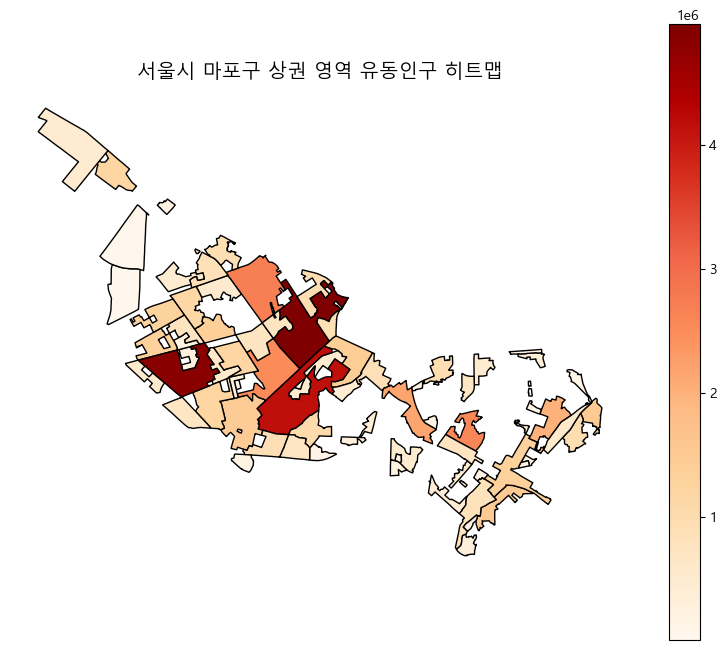

In [69]:
# 시각화
if len(merged_df) > 0:
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # POP 컬럼 기준으로 색 지정, cmap은 원하는 색상맵 선택 가능
    merged_df.plot(column='POP', ax=ax, cmap='OrRd', edgecolor='black', legend=True)
    
    plt.title("서울시 마포구 상권 영역 유동인구 히트맵", fontsize=14)
    plt.axis('off')  # 좌표 축 제거
    plt.show()
else:
    print("마포구 데이터를 찾을 수 없습니다.")

In [73]:
merged_df

,TRDAR_SE_C,TRDAR_SE_1,TRDAR_CD,TRDAR_CD_N,XCNTS_VALU,YDNTS_VALU,SIGNGU_CD,SIGNGU_CD_,ADSTRD_CD,ADSTRD_CD_,RELM_AR,geometry,POP
0,A,골목상권,3110566,경의선책거리,193685.0,450750.0,11440,마포구,11440660,서교동,156743.0,"POLYGON ((193830.531 450892.687, 193885.91 450...",1434501
1,R,전통시장,3130193,신수시장,194286.0,449527.0,11440,마포구,11440630,신수동,6691.0,"POLYGON ((194286.605 449572.532, 194293.07 449...",59626
2,R,전통시장,3130192,동진시장,193538.0,451420.0,11440,마포구,11440710,연남동,4091.0,"POLYGON ((193531.845 451450.841, 193545.125 45...",44199
3,R,전통시장,3130191,홍대 걷고싶은 거리,193388.0,450714.0,11440,마포구,11440660,서교동,58130.0,"POLYGON ((193586.215 450816.234, 193589.537 45...",549158
4,R,전통시장,3130198,아현시장,195969.0,450765.0,11440,마포구,11440555,아현동,27671.0,"POLYGON ((195996.515 450827.227, 195998.712 45...",366268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,A,골목상권,3110584,아현역 4번,195866.0,450839.0,11440,마포구,11440555,아현동,14177.0,"POLYGON ((196053.261 450871.588, 196054.318 45...",95175
73,A,골목상권,3110545,마포구청역 1번,191544.0,451746.0,11440,마포구,11440730,성산2동,87346.0,"POLYGON ((191547.904 451804.773, 191551.771 45...",474386
74,A,골목상권,3110544,망리단길,191619.0,450607.0,11440,마포구,11440690,망원1동,311648.0,"POLYGON ((191923.535 450905.084, 191940.538 45...",4852304
75,A,골목상권,3110543,중암중학교,191421.0,452638.0,11440,마포구,11440730,성산2동,21216.0,"POLYGON ((191473.172 452697.562, 191493.119 45...",145384


In [82]:
import folium
import branca.colormap as cm

# 1. 좌표계 변환 (Folium은 EPSG:4326 필요)
if merged_df.crs != 'EPSG:4326':
    merged_df_wgs = merged_df.to_crs('EPSG:4326')
else:
    merged_df_wgs = merged_df.copy()

if trash.crs != 'EPSG:4326':
    trash_wgs = trash.to_crs('EPSG:4326')
else:
    trash_wgs = trash.copy()

if mapo_hang.crs != 'EPSG:4326':
    mapo_hang_wgs = mapo_hang.to_crs('EPSG:4326')
else:
    mapo_hang_wgs = mapo_hang.copy()

# 2. 마포구 중심 좌표
center = [merged_df_wgs.geometry.centroid.y.mean(), 
          merged_df_wgs.geometry.centroid.x.mean()]

# 3. Folium 지도 생성 - 배경 지도 스타일 선택
# 옵션 1: 밝은 회색 배경 (추천!)
m = folium.Map(
    location=center, 
    zoom_start=13, 
    tiles='CartoDB positron',  # 흐린 배경
    attr='CartoDB'
)

# 옵션 2: 어두운 배경
# m = folium.Map(location=center, zoom_start=13, tiles='CartoDB dark_matter')

# 옵션 3: 배경 없음 (흰색)
# m = folium.Map(location=center, zoom_start=13, tiles=None)
# folium.TileLayer('CartoDB positron', attr='CartoDB', opacity=0.3).add_to(m)

# 4. POP 기반 색상 맵 생성 (OrRd 컬러맵)
pop_min = merged_df_wgs['POP'].min()
pop_max = merged_df_wgs['POP'].max()

colormap = cm.LinearColormap(
    colors=['#FFF5F0', '#FEE0D2', '#FCBBA1', '#FC9272', '#FB6A4A', '#EF3B2C', '#CB181D', '#99000D'],
    vmin=pop_min,
    vmax=pop_max,
    caption='유동인구 수 (POP)'
)

# 5. 상권 영역 히트맵 (POP 기반 색칠)
for idx, row in merged_df_wgs.iterrows():
    pop_value = row['POP']
    color = colormap(pop_value)
    
    # 툴팁 정보 구성
    tooltip_text = f"""
    <b>상권명:</b> {row['TRDAR_CD_N']}<br>
    <b>유동인구:</b> {pop_value:,.0f}명<br>
    <b>구분:</b> {row['TRDAR_SE_1']}<br>
    <b>시군구:</b> {row['SIGNGU_CD_']}
    """
    
    folium.GeoJson(
        row['geometry'].__geo_interface__,
        style_function=lambda x, color=color: {
            'fillColor': color,
            'fillOpacity': 0.7,
            'color': 'black',
            'weight': 0.5,
            'opacity': 0.8
        },
        tooltip=folium.Tooltip(tooltip_text)
    ).add_to(m)

# 6. 마포구 행정동 경계 (어두운 회색 선으로 조화)
folium.GeoJson(
    mapo_hang_wgs,
    name='마포구 행정동',
    style_function=lambda x: {
        'fillColor': 'none',
        'color': '#555555',  # 어두운 회색
        'weight': 2.5,
        'opacity': 0.8,
        'fillOpacity': 0,
        'dashArray': '5, 5'  # 점선 스타일 (선택사항)
    },
    tooltip=folium.GeoJsonTooltip(fields=['adm_nm'], aliases=['행정동:'])
).add_to(m)

# 7. 쓰레기통 위치 (주황색 계열로 히트맵과 조화)
for idx, row in trash_wgs.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=6,
        color='#8B0000',  # 어두운 빨강 테두리
        fill=True,
        fillColor='#FF4500',  # 주황빨강
        fillOpacity=0.8,
        weight=2,
        popup=f"쓰레기통 {idx}"
    ).add_to(m)

# 8. 컬러바 범례 추가
colormap.add_to(m)

# 9. 레이어 컨트롤
folium.LayerControl().add_to(m)

# 10. 지도 저장 및 표시
m.save('mapo_heatmap.html')
print(f"✓ 지도 생성 완료!")
print(f"  - 상권 개수: {len(merged_df_wgs)}")
print(f"  - 쓰레기통 개수: {len(trash_wgs)}")
print(f"  - POP 범위: {pop_min:,.0f} ~ {pop_max:,.0f}")

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_44728\82033438.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [merged_df_wgs.geometry.centroid.y.mean(),
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_44728\82033438.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_df_wgs.geometry.centroid.x.mean()]


✓ 지도 생성 완료!
  - 상권 개수: 77
  - 쓰레기통 개수: 293
  - POP 범위: 6,626 ~ 4,978,765
